# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:


url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{url}appid={weather_api_key}&units={units}&q='
counter = 1

citycity = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()


print('City Number and Name Information')


for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        citycity.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        print(f'City Number - {counter} | City Name - {city}')
        counter = counter + 1
    except KeyError:
        print('City Not Found')


        


City Number and Name Information
City Number - 1 | City Name - strezhevoy
City Number - 2 | City Name - kloulklubed
City Number - 3 | City Name - xiaoshi
City Number - 4 | City Name - oranjestad
City Number - 5 | City Name - san patricio
City Not Found
City Number - 6 | City Name - nemuro
City Not Found
City Number - 7 | City Name - hilo
City Number - 8 | City Name - lompoc
City Not Found
City Number - 9 | City Name - albany
City Number - 10 | City Name - busselton
City Number - 11 | City Name - new norfolk
City Number - 12 | City Name - laguna
City Number - 13 | City Name - port elizabeth
City Number - 14 | City Name - bredasdorp
City Number - 15 | City Name - atuona
City Not Found
City Number - 16 | City Name - mar del plata
City Number - 17 | City Name - ostersund
City Number - 18 | City Name - jamestown
City Number - 19 | City Name - vostok
City Number - 20 | City Name - kapaa
City Number - 21 | City Name - punta arenas
City Number - 22 | City Name - vilhena
City Number - 23 | City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame ({
'City': citycity,
'Latitude': lat,
'Longitude': lng,
'Max Temp': max_temp,
'Humidity': humidity,
'Cloudiness': cloudiness,
'Wind Speed': wind_speed,
'Country': country,
'Date': pd.to_datetime(date, unit = "s")})

city_df.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Strezhevoy,60.7333,77.5889,46.38,92,100,9.84,RU,2021-09-10 21:28:09
1,Kloulklubed,7.0419,134.2556,79.30,74,100,15.48,PW,2021-09-10 21:24:12
2,Xiaoshi,41.2971,124.1209,60.82,99,51,5.32,CN,2021-09-10 21:28:09
3,Oranjestad,12.5240,-70.0270,87.75,70,20,24.16,AW,2021-09-10 21:23:37
4,San Patricio,28.0170,-97.5169,96.89,43,2,18.59,US,2021-09-10 21:28:10


In [5]:
city_df.to_csv('cities.csv')

## Latitude vs. Temperature Plot

In the Latitude vs Temperature plot there does not seem to be a significant correlation, at least visually. 


In [6]:
#Variables needed for plotting 

lat = city_df['Latitude']
temp = city_df['Max Temp']
humidity = city_df['Humidity']
clouds = city_df['Cloudiness']
winds = city_df['Wind Speed']

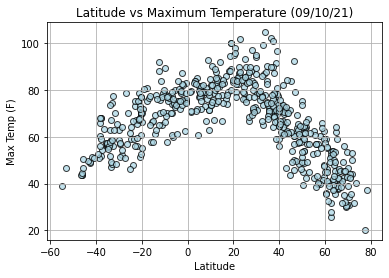

In [7]:
plt.scatter(lat, temp, edgecolor = 'black', color = 'lightblue', linewidths=1, marker = 'o', alpha=.75)
plt.title('Latitude vs Maximum Temperature (%s)' % time.strftime ('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

There does not seem to be a visual correlation for latitude and humidity. The plot is showing data all over the place regardless of position latitude. 

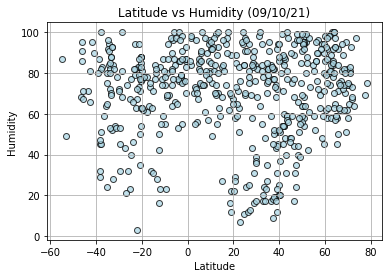

In [8]:
plt.scatter(lat, humidity, edgecolor = 'black', color = 'lightblue', linewidths=1, marker = 'o', alpha=.75)
plt.title('Latitude vs Humidity (%s)' % time.strftime ('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

Visually there is no correlation, all points are scattered throughout the data with a few outliers. 


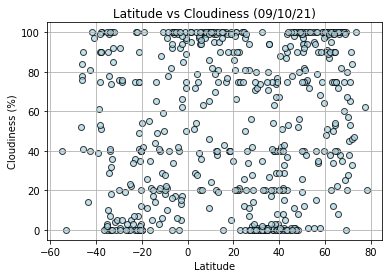

In [9]:
plt.scatter(lat, clouds, edgecolor = 'black', color = 'lightblue', linewidths=1, marker = 'o', alpha=.75)
plt.title('Latitude vs Cloudiness (%s)' % time.strftime ('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

Again, visually there is no correlation. Data is scattered throughout the plot regardless of position latitude. 


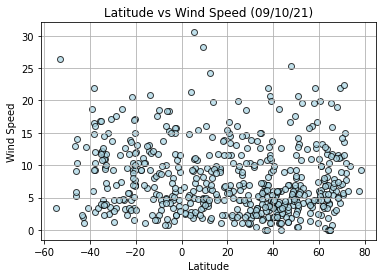

In [10]:
plt.scatter(lat, wind_speed, edgecolor = 'black', color = 'lightblue', linewidths=1, marker = 'o', alpha=.75)
plt.title('Latitude vs Wind Speed (%s)' % time.strftime ('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.show()

## Linear Regression

In [11]:
#creating a function to call linear regression on plots rather than keying it multiple times. 

def lin_reg(x_values, y_values, title, text_coordinates):

    (slope , intercept, rvalue , pvalue , stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y =' + str(round(slope , 4)) + 'x +' + str(round(intercept , 4))
    plt.scatter(x_values, y_values, edgecolor='black',color = 'lightblue', linewidths=1, marker='o', alpha=.75)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color='black')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [12]:
# create Northern and Southern Hemisphere DataFrames
n_hemi_df = city_df[city_df['Latitude'] >= 0] 
s_hemi_df = city_df[city_df['Latitude'] <= 0] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In the Northern Hemisphere the further you get from the equator the lower the max temp should be. 

The r-value is: 0.6240030675213889


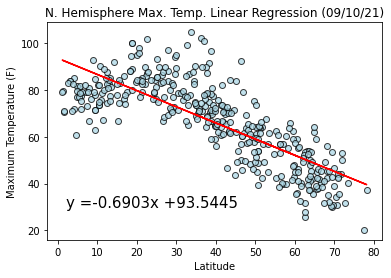

In [13]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Max Temp']
plt.title("N. Hemisphere Max. Temp. Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Maximum Temperature (F)', (2,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
In the southern hemisphere the closer you get to the equator the higher the temperature rises. 

The r-value is: 0.5503914491161472


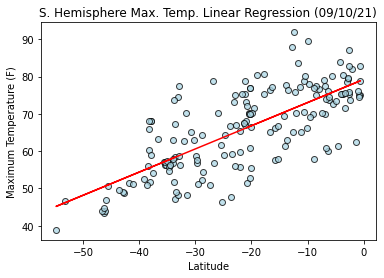

In [14]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Max Temp']
plt.title("S. Hemisphere Max. Temp. Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Maximum Temperature (F)', (-28,30))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
There are a ton of values outside of the linear regression calculations in the northern hemisphere for humidity. 

The r-value is: 0.0008100637849159665


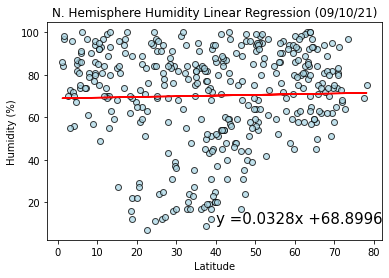

In [15]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Humidity']
plt.title("N. Hemisphere Humidity Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Humidity (%)', (40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
The southern hemisphere follows suit with the northern hemisphere in terms of linear regression. 


The r-value is: 0.01331516440199206


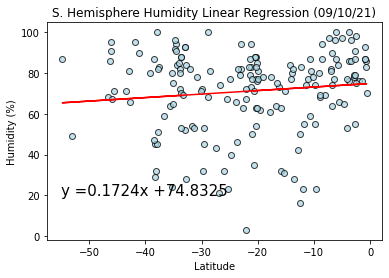

In [16]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Humidity']
plt.title("S. Hemisphere Humidity Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Humidity (%)', (-55,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Almost all values fall out of the linear regression model for cloudiness in the northern hemisphere.


The r-value is: 0.00020680295118386942


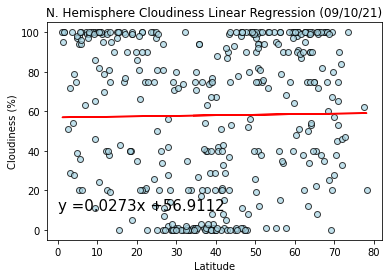

In [17]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Cloudiness']
plt.title("N. Hemisphere Cloudiness Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Cloudiness (%)', (0,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

For this model the southern hemisphere follows suit with the northern hemisphere. 

The r-value is: 0.004577427332736274


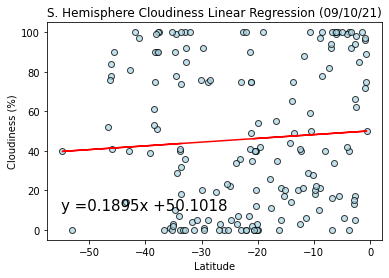

In [18]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Cloudiness']
plt.title("S. Hemisphere Cloudiness Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Cloudiness (%)', (-55,10))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

I would say about half of the values for the northern hemisphere are below the linear regression calculations. 

The r-value is: 0.00010462207526254942


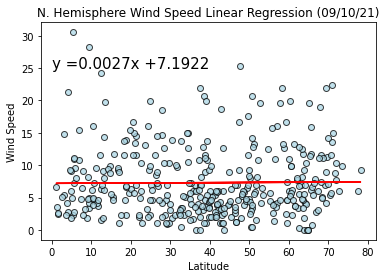

In [19]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Wind Speed']
plt.title("N. Hemisphere Wind Speed Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Wind Speed', (0,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Again, the southern hemisphere follows suit with the northern hemisphere for these calculations. 

The r-value is: 0.013294224936521354


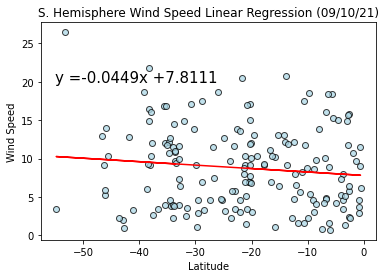

In [20]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Wind Speed']
plt.title("S. Hemisphere Wind Speed Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Wind Speed', (-55,20))